# Well Being Exploration

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline 


In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("aux_data/diaries_wellbeing_ind.csv")

In [4]:
df.shape

(7835, 7)

# First I will reformat the date so that we have it in the proper format (using the date class from the module datetime).

In [79]:
from datetime import date

In [130]:
df.insert(3,"int_date2",[date(2000,1,1)]*df.shape[0])

In [131]:
df.head()

,hh_ids,m_ids,int_date,int_date2,happiness,economically,relationships,confidence
0,KNBOK41,5.010000e+16,26nov2012,2000-01-01,5.0,1.0,5.0,5.0
1,KNBOK41,5.010000e+16,10dec2012,2000-01-01,3.0,4.0,5.0,5.0
2,KNBOK41,5.010000e+16,21jan2013,2000-01-01,5.0,4.0,5.0,5.0
3,KNBOK41,5.010000e+16,05feb2013,2000-01-01,3.0,3.0,5.0,5.0
4,KNBOK41,5.010000e+16,19feb2013,2000-01-01,5.0,4.0,4.0,5.0


In [132]:
for index, row in df.iterrows():
    day = int(df.loc[index,"int_date"][0:2])
    year = int(df.loc[index,"int_date"][5:9])
    if df.loc[index,"int_date"][2:5] == "jan":
        month = 1
    elif df.loc[index,"int_date"][2:5] == "feb":
        month = 2
    elif df.loc[index,"int_date"][2:5] == "mar":
        month = 3
    elif df.loc[index,"int_date"][2:5] == "apr":
        month = 4
    elif df.loc[index,"int_date"][2:5] == "may":
        month = 5
    elif df.loc[index,"int_date"][2:5] == "jun":
        month = 6
    elif df.loc[index,"int_date"][2:5] == "jul":
        month = 7
    elif df.loc[index,"int_date"][2:5] == "aug":
        month = 8
    elif df.loc[index,"int_date"][2:5] == "sep":
        month = 9
    elif df.loc[index,"int_date"][2:5] == "oct":
        month = 10
    elif df.loc[index,"int_date"][2:5] == "nov":
        month = 11
    elif df.loc[index,"int_date"][2:5] == "dec":
        month = 12
    else:
        print("The date seems to be in an odd format.",dfh.loc[index,"int_date"][0:2],dfh.loc[index,"int_date"][2:5],dfh.loc[index,"int_date"][5:9])
    
    df.at[index,"int_date2"]=date(year,month,day)

In [133]:
df.head()

,hh_ids,m_ids,int_date,int_date2,happiness,economically,relationships,confidence
0,KNBOK41,5.010000e+16,26nov2012,2012-11-26,5.0,1.0,5.0,5.0
1,KNBOK41,5.010000e+16,10dec2012,2012-12-10,3.0,4.0,5.0,5.0
2,KNBOK41,5.010000e+16,21jan2013,2013-01-21,5.0,4.0,5.0,5.0
3,KNBOK41,5.010000e+16,05feb2013,2013-02-05,3.0,3.0,5.0,5.0
4,KNBOK41,5.010000e+16,19feb2013,2013-02-19,5.0,4.0,4.0,5.0


## Below I will also rename the columns to have them in numerical values. This is the only way that the plotting function will work I think.

# Explanation: 
###    q1: How happy have you been since I saw you last?
###    q2: How have you been doing economically since I saw you last?
###    q3: How have your relationship with people been since I saw you last?
###    q4: How confident in yourself have you been feeling since I saw you last?

In [23]:
df.head()

,hh_ids,m_ids,int_date,wellbeing_q1,wellbeing_q2,wellbeing_q3,wellbeing_q4
0,KNBOK41,5.010000e+16,26nov2012,Very happy,Very badly,Very well,Very confident
1,KNBOK41,5.010000e+16,10dec2012,Neither happy nor unhappy,Moderately well,Very well,Very confident
2,KNBOK41,5.010000e+16,21jan2013,Very happy,Moderately well,Very well,Very confident
3,KNBOK41,5.010000e+16,05feb2013,Neither happy nor unhappy,Neither well nor badly,Very well,Very confident
4,KNBOK41,5.010000e+16,19feb2013,Very happy,Moderately well,Moderately well,Very confident


## Let's first rename the columns with more meaningful names.

In [47]:
df.rename(columns={"wellbeing_q1":"happiness", "wellbeing_q2":"economically", "wellbeing_q3":"relationships", "wellbeing_q4":"confidence"}, inplace=True)

In [48]:
df.head()

,hh_ids,m_ids,int_date,happiness,economically,relationships,confidence
0,KNBOK41,5.010000e+16,26nov2012,5.0,1.0,5.0,5.0
1,KNBOK41,5.010000e+16,10dec2012,3.0,4.0,5.0,5.0
2,KNBOK41,5.010000e+16,21jan2013,5.0,4.0,5.0,5.0
3,KNBOK41,5.010000e+16,05feb2013,3.0,3.0,5.0,5.0
4,KNBOK41,5.010000e+16,19feb2013,5.0,4.0,4.0,5.0


In [24]:
df.shape

(7835, 7)

# q1: How happy have you been since I saw you last?

In [4]:
df["wellbeing_q1"].describe()

count                 7825
unique                   5
top       Moderately happy
freq                  4693
Name: wellbeing_q1, dtype: object

array(['Very happy', 'Neither happy nor unhappy', 'Moderately happy',
       'Moderately unhappy', nan, 'Very unhappy'], dtype=object)

In [26]:
df["wellbeing_q1"].value_counts()

Moderately happy             4693
Very happy                   1623
Neither happy nor unhappy     953
Moderately unhappy            409
Very unhappy                  147
Name: wellbeing_q1, dtype: int64

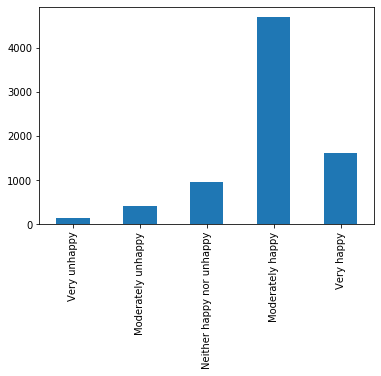

In [5]:
df["wellbeing_q1"].value_counts()[["Very unhappy", "Moderately unhappy", "Neither happy nor unhappy", "Moderately happy", "Very happy"]].plot(kind="bar")

In [9]:
df["wellbeing_q1"].replace({"Very unhappy":1,"Moderately unhappy":2, "Neither happy nor unhappy":3, "Moderately happy":4, "Very happy":5}, inplace = True)

In [10]:
df["wellbeing_q1"].value_counts()

4.0    4693
5.0    1623
3.0     953
2.0     409
1.0     147
Name: wellbeing_q1, dtype: int64

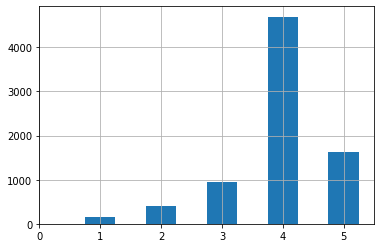

In [28]:
df["wellbeing_q1"].hist(bins=np.arange(0.25,5.75,0.5))

# q2: How have you been doing economically since I saw you last?

In [30]:
df["wellbeing_q2"].describe()

count                7802
unique                  5
top       Moderately well
freq                 3389
Name: wellbeing_q2, dtype: object

In [31]:
df["wellbeing_q2"].unique()

array(['Very badly', 'Moderately well', 'Neither well nor badly',
       'Very well', 'Moderately badly', nan], dtype=object)

In [41]:
df["wellbeing_q2"].value_counts()

Moderately well           3389
Neither well nor badly    2367
Moderately badly          1262
Very badly                 506
Very well                  278
Name: wellbeing_q2, dtype: int64

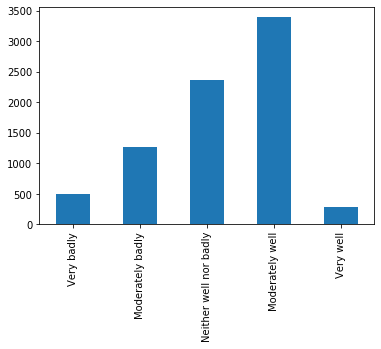

In [42]:
df["wellbeing_q2"].value_counts()[["Very badly", "Moderately badly", "Neither well nor badly", "Moderately well", "Very well"]].plot(kind="bar")

In [25]:
df["wellbeing_q2"].replace({"Very badly":1, "Moderately badly":2, "Neither well nor badly":3, "Moderately well":4, "Very well":5},inplace=True)

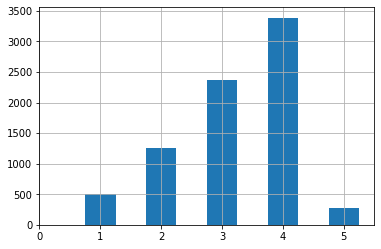

In [27]:
df["wellbeing_q2"].hist(bins=np.arange(0.25,5.75,0.5))

# q3: How have your relationship with people been since I saw you last?

In [43]:
df["wellbeing_q3"].describe()

count          7784
unique            5
top       Very well
freq           4223
Name: wellbeing_q3, dtype: object

In [44]:
df["wellbeing_q3"].unique()

array(['Very well', 'Moderately well', 'Neither well nor badly', nan,
       'Moderately badly', 'Very badly'], dtype=object)

In [45]:
df["wellbeing_q3"].value_counts()

Very well                 4223
Moderately well           3229
Neither well nor badly     260
Moderately badly            58
Very badly                  14
Name: wellbeing_q3, dtype: int64

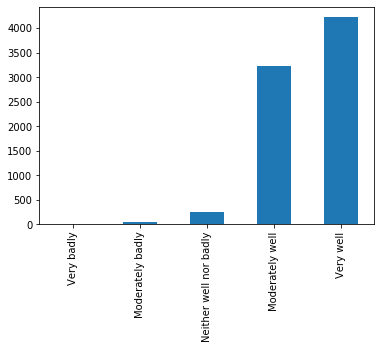

In [46]:
df["wellbeing_q3"].value_counts()[["Very badly", "Moderately badly", "Neither well nor badly", "Moderately well", "Very well"]].plot(kind="bar")

In [29]:
df["wellbeing_q3"].replace({"Very badly":1, "Moderately badly":2, "Neither well nor badly":3, "Moderately well":4, "Very well":5},inplace = True)

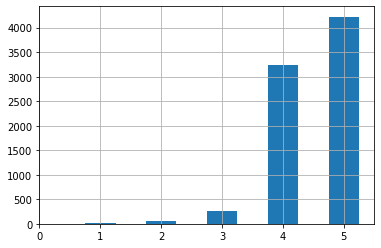

In [31]:
df["wellbeing_q3"].hist(bins=np.arange(0.25,5.75,0.5))

#    q4: How confident in yourself have you been feeling since I saw you last?

In [47]:
df["wellbeing_q4"].describe()

count               7777
unique                 5
top       Very confident
freq                4125
Name: wellbeing_q4, dtype: object

In [48]:
df["wellbeing_q4"].unique()

array(['Very confident', 'Moderately confident', 'Moderately unconfident',
       'Neither confident nor unconfident', nan, 'Very unconfident'],
      dtype=object)

In [49]:
df["wellbeing_q4"].value_counts()

Very confident                       4125
Moderately confident                 3139
Neither confident nor unconfident     443
Moderately unconfident                 51
Very unconfident                       19
Name: wellbeing_q4, dtype: int64

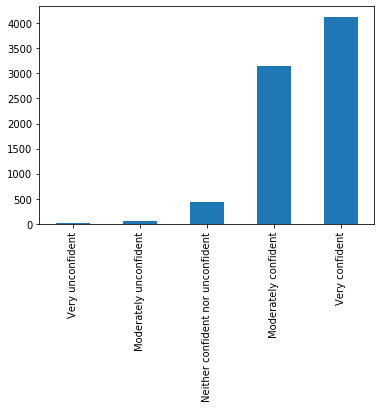

In [50]:
df["wellbeing_q4"].value_counts()[["Very unconfident", "Moderately unconfident", "Neither confident nor unconfident", "Moderately confident", "Very confident"]].plot(kind="bar")

In [32]:
df["wellbeing_q4"].replace({"Very unconfident":1, "Moderately unconfident":2, "Neither confident nor unconfident":3, "Moderately confident":4, "Very confident":5},inplace = True)

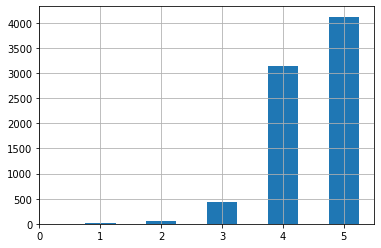

In [33]:
df["wellbeing_q4"].hist(bins=np.arange(0.25,5.75,0.5))

# Let us now look at a single household.

In [34]:
df["hh_ids"].describe()

count        7835
unique        298
top       KMOMK08
freq          114
Name: hh_ids, dtype: object

In [36]:
rid = rd.choice(df["hh_ids"].unique())

# rid = KMAKL23

In [38]:
rid = "KMAKL23"

In [51]:
dfh = df[df["hh_ids"]==rid]

In [52]:
dfh

,hh_ids,m_ids,int_date,happiness,economically,relationships,confidence
6719,KMAKL23,6.510000e+16,22oct2012,4.0,4.0,5.0,4.0
6720,KMAKL23,6.510000e+16,12nov2012,4.0,3.0,4.0,5.0
6721,KMAKL23,6.510000e+16,28nov2012,3.0,3.0,4.0,3.0
6722,KMAKL23,6.510000e+16,30jan2013,4.0,4.0,5.0,4.0
6723,KMAKL23,6.510000e+16,26feb2013,4.0,5.0,5.0,4.0
6724,KMAKL23,6.510000e+16,12mar2013,4.0,4.0,5.0,4.0
6725,KMAKL23,6.510000e+16,26mar2013,5.0,5.0,4.0,4.0
6726,KMAKL23,6.510000e+16,23apr2013,4.0,5.0,4.0,4.0
6727,KMAKL23,6.510000e+16,07may2013,4.0,4.0,4.0,4.0
6728,KMAKL23,6.510000e+16,21may2013,5.0,5.0,4.0,4.0


In [40]:
dfh.shape

(22, 7)

In [41]:
dfh["m_ids"].unique()

array([6.51e+16])

### So this household has only one member.

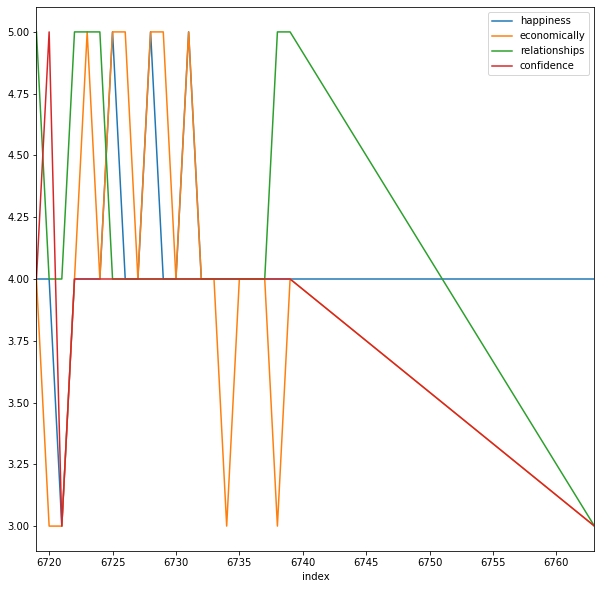

In [54]:
dfh.reset_index().plot(x="index", y=["happiness","economically","relationships","confidence"], figsize=(10,10))

# Let's look at another one.

In [55]:
rid = rd.choice(df["hh_ids"].unique())

In [57]:
print(rid)

KNBOK26


rid = KNBOK26

In [60]:
dfh=df[df["hh_ids"]==rid]

In [61]:
dfh["m_ids"].unique()

array([6.41e+16, 8.91e+16])

Yey two members.

In [67]:
dfh.shape

(35, 7)

In [68]:
dfh

,hh_ids,m_ids,int_date,happiness,economically,relationships,confidence
6242,KNBOK26,6.410000e+16,15jan2013,4.0,1.0,5.0,5.0
6243,KNBOK26,6.410000e+16,04dec2012,4.0,4.0,5.0,5.0
6244,KNBOK26,6.410000e+16,21nov2012,5.0,3.0,5.0,5.0
6245,KNBOK26,6.410000e+16,29jan2013,5.0,2.0,5.0,5.0
6246,KNBOK26,6.410000e+16,13feb2013,4.0,1.0,5.0,5.0
6247,KNBOK26,6.410000e+16,07mar2013,4.0,3.0,4.0,5.0
6248,KNBOK26,6.410000e+16,13mar2013,2.0,2.0,5.0,5.0
6249,KNBOK26,6.410000e+16,15apr2013,5.0,4.0,5.0,5.0
6250,KNBOK26,6.410000e+16,07may2013,5.0,2.0,4.0,5.0
6251,KNBOK26,6.410000e+16,21may2013,5.0,2.0,4.0,5.0


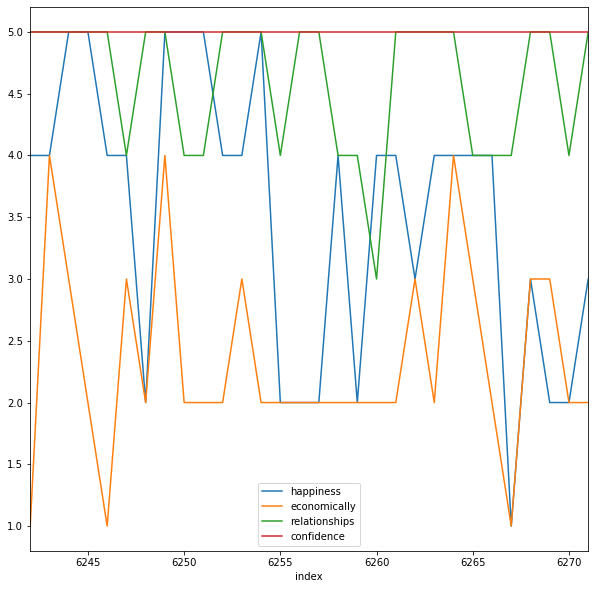

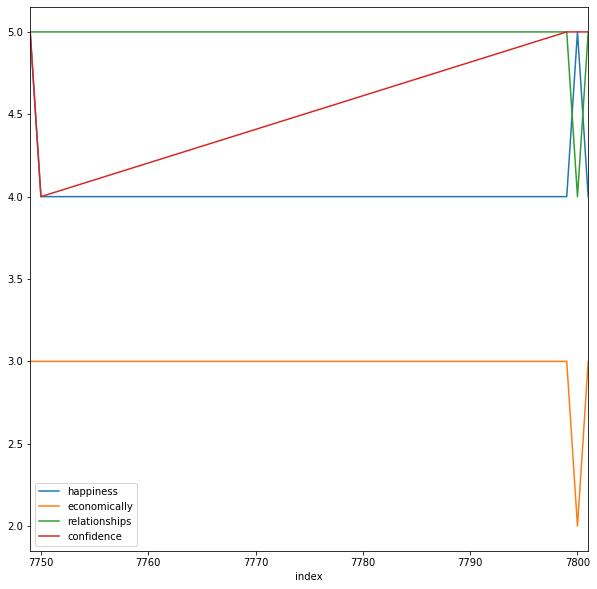

In [69]:
for ind in dfh["m_ids"].unique():
    dfh[dfh["m_ids"]==ind].reset_index().plot(x="index", y=["happiness","economically","relationships","confidence"],figsize=(10,10))

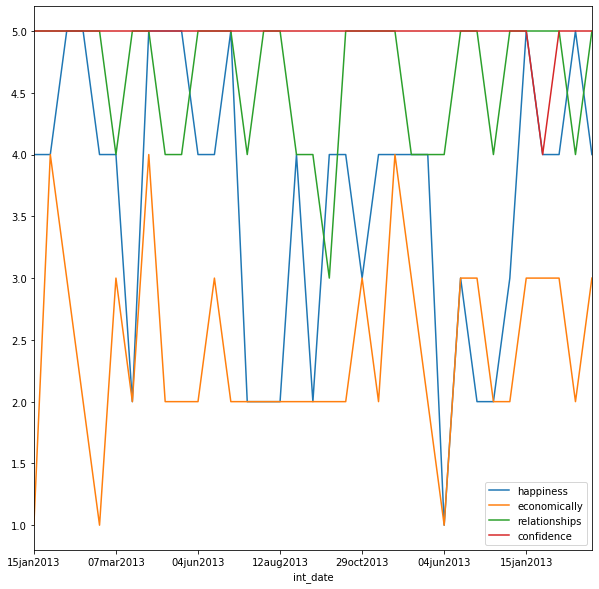

In [74]:
dfh.plot(x="int_date", y=["happiness","economically","relationships","confidence"],figsize=(10,10))

Let's see if I can change the date and if this gives better plots.

In [73]:
dfh["int_date"].describe()

count            35
unique           23
top       04jun2013
freq              2
Name: int_date, dtype: object

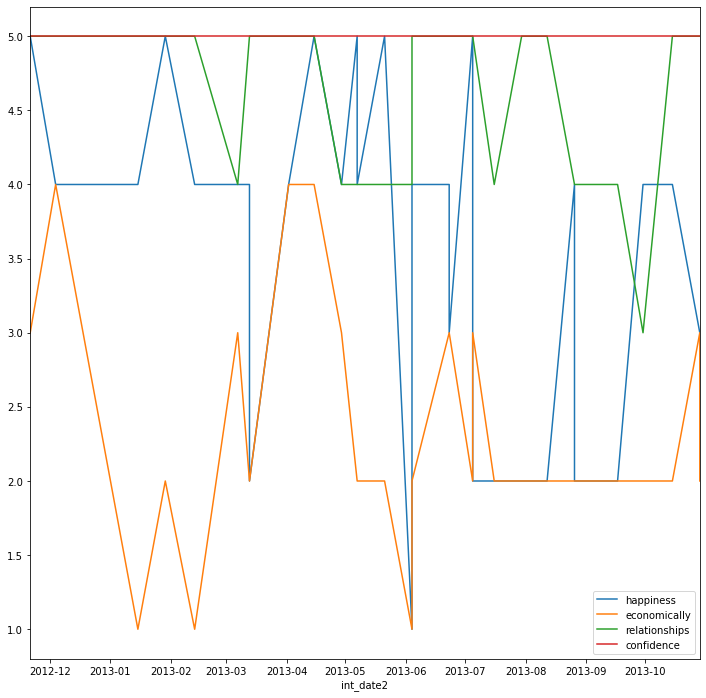

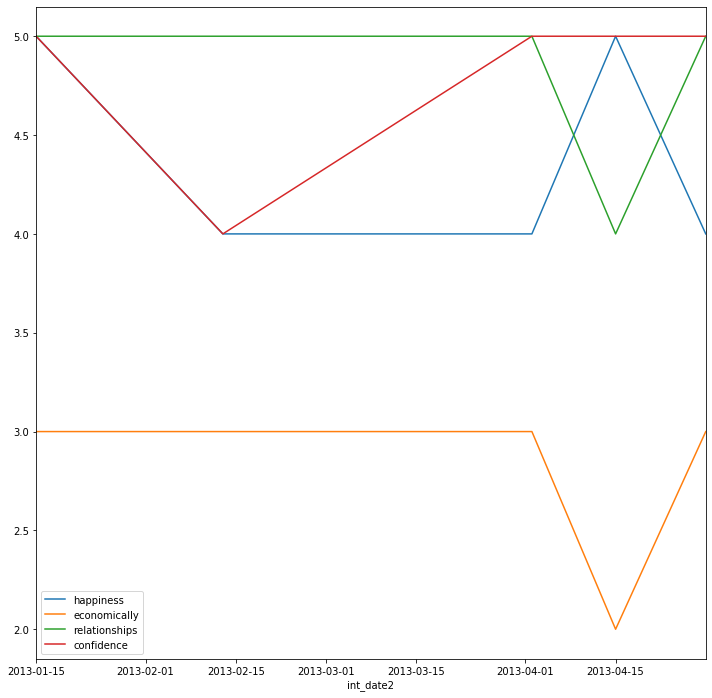

In [134]:
for ind in dfh["m_ids"].unique():
    dfh[dfh["m_ids"]==ind].plot(x="int_date2",y=["happiness","economically","relationships","confidence"],figsize=(12,12))

## In the first graph above, there seem to sometimes be several entries for the same date, but with different values. This is very confusing.